In [81]:
import pandas as pd

data=pd.read_csv("MeMas_5min.csv",header=0,infer_datetime_format=True,parse_dates=['Data'],index_col=['Data'])
hourly_data=data.resample('H').sum()

In [82]:
dataset2 = hourly_data.truncate('2019-04-07','2019-11-17')
train_index1 = int(round(dataset2.size*(3/4)))
eval_index1 = int(round(dataset2.size*(1/4)))
dataset2

,Ativa
Data,
2019-04-07 00:00:00,587.52
2019-04-07 01:00:00,586.08
2019-04-07 02:00:00,584.64
2019-04-07 03:00:00,584.64
2019-04-07 04:00:00,581.76
...,...
2019-11-16 20:00:00,614.88
2019-11-16 21:00:00,615.60
2019-11-16 22:00:00,609.12


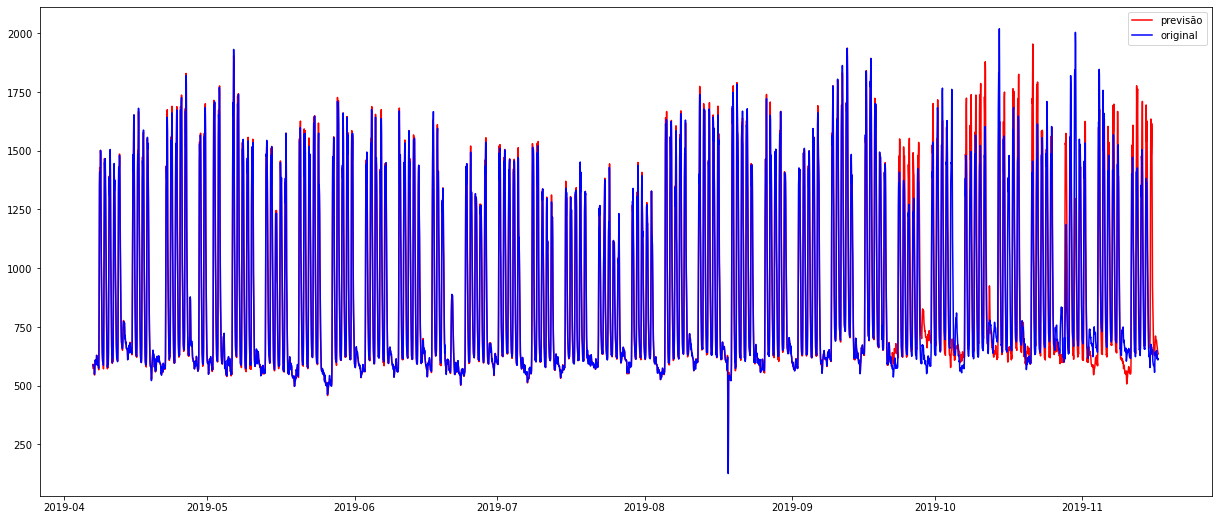

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
    
def fourierExtrapolation(x, n_predict, n_harm):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
x =dataset2['Ativa'][0:train_index1].to_numpy()
n_predict = eval_index1
extrapolation = fourierExtrapolation(x, n_predict, 1100)
plt.figure(figsize=(21,9))
plt.plot(dataset2.index, extrapolation, 'r', label = 'previsão')
plt.plot(dataset2.index, dataset2, 'b', label = 'original')
plt.legend()
plt.show()

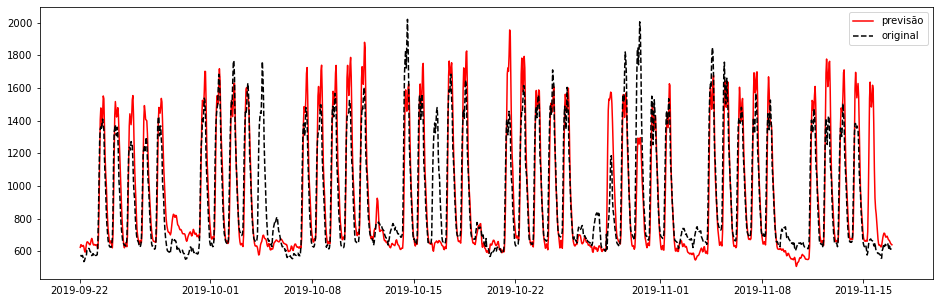

In [88]:
plt.figure(figsize=(16,5))
plt.plot(dataset2.index[-eval_index1:-1], extrapolation[-eval_index1:-1], 'r', label = 'previsão')
plt.plot(dataset2.index[-eval_index1:-1], dataset2[-eval_index1:-1],'k--', label = 'original')
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(dataset2,extrapolation)
mse

9331.497348383828

In [90]:
n_harm_test = [50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000,1500,2000,3000,4000,5000,10000,50000,100000]
import numpy as np
for a in n_harm_test:
    extrapolation = fourierExtrapolation(x, n_predict, a)
    mse = mean_squared_error(dataset2,extrapolation)
    print(a, '          ',np.sqrt(mse))

50            304.28678800433727
100            302.040833239366
150            280.0377636287607
200            129.80722830622537
250            121.05336483824019
300            118.7582234675307
350            110.03460025838966
400            109.01521072548604
450            108.66249160422863
500            107.85211785702182
600            103.13939849094284
700            98.02105181358924
800            97.5748107178585
900            96.74170326375122
1000            96.67244002904908
1500            96.38989494079358
2000            96.11528215437262
3000            96.10649563295321
4000            96.10649563295321
5000            96.10649563295321
10000            96.10649563295321
50000            96.10649563295321
100000            96.10649563295321
